# Introduction

- The aim of the project is to do an analysis on the COVID19 spread in India and try to find new metrics to better understand the same.

- The dataset used is the [COVID-19 in India](https://www.kaggle.com/sudalairajkumar/covid19-in-india) dataset by [SRK](https://www.kaggle.com/sudalairajkumar) from [Kaggle](https://www.kaggle.com/).



# Importing libraries and datasets

In [0]:
# basic libraries
import numpy  as np # numerical library
import pandas as pd # for creating dataframes

In [0]:
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline

In [0]:
# importing the census 2011 data
cen = pd.read_csv('population_india_census2011.csv')
cen.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [0]:
# importing the covid india dataset
cov = pd.read_csv('covid_19_india.csv')
cov.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


# Data Cleaning

### checking columns

In [0]:
# checing census column names.
cen.columns

Index(['Sno', 'State / Union Territory', 'Population', 'Rural population',
       'Urban population', 'Area', 'Density', 'Gender Ratio'],
      dtype='object')

In [0]:
# checking covid 19 column names
cov.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [0]:
# checking the unique values in Time column to ascertain the value of th column.
cov.Time.unique()

array(['6:00 PM', '10:00 AM', '7:30 PM', '9:30 PM', '8:30 PM', '5:00 PM',
       '8:00 AM'], dtype=object)

**Observations**

- covid 19 dataframe

  - The 'SNo' column is redundant.

  - The 'Time' column notes the time of the case being confirmed. This can be dropped as it won't be used in this particular analysis although it does serve the purpose of showing at what times were the most cases reported.

  - The point of having separate columns for Indian and Foreign nationals is redundant as the number of cases is far beyond for it to matter. A combined column showing the number of confirmed will suffce.

- census dataframe

  - The 'SNo' column is redundant.

  - The 'State / Union Territory' column name will have to be changed to match to the other dataframe.

  - The 'Rural population' and 'Urban population' column can be dropped as they are not going to be used in this analysis and the 'population' column in itself is sufficient.


### dropping unnessacary columns

In [0]:
# dropping the columns not necessary for the analysis.

cov.drop([
          'Sno',
          'Time',
          'ConfirmedIndianNational',
          'ConfirmedForeignNational'
          ],
         axis=1, 
         inplace=True)

cen.drop([
          'Sno',
          'Rural population',
          'Urban population'
          ],axis=1,
         inplace=True)

# renaming the column name for 'State / Union Territory' in census dataframe.

cen.columns = [
               'State/UnionTerritory', 
               'Population', 
               'Area', 
               'Density', 
               'GenderRatio'
               ]

### treating null values and data types

In [0]:
# checking null values
cov.isna().sum()

Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
dtype: int64

In [0]:
cen.isna().sum()

State/UnionTerritory    0
Population              0
Area                    0
Density                 0
GenderRatio             0
dtype: int64

In [0]:
cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  2486 non-null   object
 1   State/UnionTerritory  2486 non-null   object
 2   Cured                 2486 non-null   int64 
 3   Deaths                2486 non-null   int64 
 4   Confirmed             2486 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 97.2+ KB


**Observations**

- The NaN values can be replaced by 0 as these are confirmed non-assigned cases which will be added to the states numbers.

- Cured and Deaths column can be converted to int from float.

In [0]:
cov.fillna(0,inplace=True)

In [0]:
cov.Cured = cov.Cured.astype(int)
cov.Deaths = cov.Deaths.astype(int)

### correcting errors

In [0]:
# checking state names mismatch or missing names in the 2 dataframes
mask = [False if state in cov['State/UnionTerritory'].unique() else True for state in cen['State/UnionTerritory'].unique()]

cen[mask]['State/UnionTerritory']



32    Dadra and Nagar Haveli and Daman and Diu
35                                 Lakshadweep
Name: State/UnionTerritory, dtype: object

In [0]:
cov['State/UnionTerritory'].unique(), len(cov['State/UnionTerritory'].unique())

# names changes required:
# 'Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu'

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya', 'Dadar Nagar Haveli',
        'Cases being reassigned to states', 'Sikkim'], dtype=object), 37)

In [0]:
cov.replace('Dadar Nagar Haveli', 'Dadra and Nagar Haveli and Daman and Diu', inplace=True)

# EDA

## Confirmed cases ranking

In [0]:
# finding the states with the most confirmed cases
# grouping the data masking for most recent date
cov[
    cov['Date']==cov['Date'].unique()[-1]                           # masking by current date
    ].sort_values(
        'Confirmed',                                                # sorting descending by 'Confirmed' 
        ascending=False
        )[[
           'State/UnionTerritory',                                  # Showing only state name and confirmed columns
           'Confirmed'
           ]].style.background_gradient(
               cmap='Blues'                                         # choosing a color gradient for the table
           ).set_table_styles([
                               {'selector':'th',                    # choosing font size and weight for table header
                                'props':[('font-size','12px'),
                                         ('font-weight','bold')]},
                               {'selector':'td',                    # choosing font size and weight for table data
                                'props':[('font-size','11px'),
                                         ('font-weight','normal')]}
           ]).hide_index()

State/UnionTerritory,Confirmed
Maharashtra,62228
Tamil Nadu,20246
Delhi,17386
Gujarat,15934
Rajasthan,8365
Madhya Pradesh,7645
Uttar Pradesh,7284
Cases being reassigned to states,5043
West Bengal,4813
Andhra Pradesh,3436


## Most Cured ranking

In [0]:
# ranking the states by the most cured cases
cov[
    cov['Date']==cov['Date'].unique()[-1]                           # masking by current date
    ].sort_values(
        'Cured',
        ascending=False                                             # sorting values by desceding order
        )[[
           'State/UnionTerritory',                                  # Showing only state name and cured columns
           'Cured'
           ]].style.background_gradient(
               cmap='Greens'                                        # choosing a color gradient for the table
           ).set_table_styles([
                               {'selector':'th',                    # choosing font size and weight for table header
                                'props':[('font-size','12px'),
                                         ('font-weight','bold')]},
                               {'selector':'td',                    # choosing font size and weight for table data
                                'props':[('font-size','11px'),      
                                         ('font-weight','normal')]}
           ]).hide_index()

State/UnionTerritory,Cured
Maharashtra,26997
Tamil Nadu,11313
Gujarat,8611
Delhi,7846
Rajasthan,5244
Madhya Pradesh,4269
Uttar Pradesh,4244
Andhra Pradesh,2226
Punjab,1949
West Bengal,1775


## Most Fatalities ranking

In [0]:
cov[
    cov['Date']==cov['Date'].unique()[-1]
    ].sort_values(
        'Deaths',
        ascending=False
        )[[
           'State/UnionTerritory',
           'Deaths'
           ]].style.background_gradient(
               cmap='Reds'
           ).set_table_styles([
                               {'selector':'th',
                                'props':[('font-size','12px'),
                                         ('font-weight','bold')]},
                               {'selector':'td',
                                'props':[('font-size','11px'),
                                         ('font-weight','normal')]}
           ]).hide_index()

State/UnionTerritory,Deaths
Maharashtra,2098
Gujarat,980
Delhi,398
Madhya Pradesh,334
West Bengal,302
Uttar Pradesh,198
Rajasthan,184
Tamil Nadu,154
Telengana,71
Andhra Pradesh,60


**Observations**

- Maharashtra and Gujarat rank high on all the lists from the number of confirmed cases to recovered to number of fatalities.

- The majority of the confirmed cases are in Mahrastra, Tamil Nadu, Gujarat and Delhi.

- Tamil Nadu has relatively lesser fatalities than the other states.

- New metrics needs to be considered to get a more hollistic view of the data.

  - $Fatality$ $Rate = \frac{Deaths}{Confirmed}$

  - $Recovered$ $Rate = \frac{Recovered}{Confirmed}$

  - $Resilience = \frac{Recovered}{Deaths}$

  - $Spread = \frac{Confirmed}{Population}$

  - Effect of population density on the spread of the disease. 

## New Metrics

In [0]:
# creating a dataframe for the most recent data with the cenus data merged
crnt = pd.merge(
    cov[
        cov['Date']==cov['Date'].unique()[-1] # masking the covid data frame to only show the most recent data
        ],
    cen,                                      # the census dataframe
    on='State/UnionTerritory',                # joining on 'State/UnionTerritory
    how='inner'                               # doing an inner join to remove all the entries not coomon to both the dataframes
    )

### Fatality Rate

- The fatality rate is to show the chances of survival of someone affected by the virus in the given state.

- The metric lies between 0 to 1.

- 0 being all confimed cases have recovered while 1 meaning all have died.

- The lower the fatality rate the better the state fares.

- There are many states with lesser cases but more losses due to the disease. The metric is important to highlight this phenomenon.

In [0]:
crnt['FatalityRate'] = crnt['Deaths']/crnt['Confirmed']

In [0]:
# looking at the fatality rate for the states
crnt.sort_values(
    'FatalityRate',ascending=False
    )[[
       'State/UnionTerritory',
       'Deaths','Confirmed',
       'FatalityRate'
       ]].style.background_gradient(
           cmap='Oranges'
       ).set_table_styles([
                           {'selector':'th',
                            'props':[('font-size','12px'),
                                     ('font-weight','bold')]},
                           {'selector':'td',
                            'props':[('font-size','11px'),
                                     ('font-weight','normal')]}
       ]).hide_index()

State/UnionTerritory,Deaths,Confirmed,FatalityRate
West Bengal,302,4813,0.062747
Gujarat,980,15934,0.061504
Madhya Pradesh,334,7645,0.043689
Meghalaya,1,27,0.037037
Maharashtra,2098,62228,0.033715
Telengana,71,2425,0.029278
Uttar Pradesh,198,7284,0.027183
Delhi,398,17386,0.022892
Rajasthan,184,8365,0.021996
Punjab,42,2197,0.019117


**Observations**

- West Bengal ranks higher in case of Fatality rate closely followed by Gujarat.

- The Fatality Rate for most of the states is quite low.

### Recovery Rate

- Recovery rate highlights the resilience of the population with respect to the diesease.

- Theoretically Recovery rate should be $(1 - Fatality Rate)$ but as we're in the middle of the pandemic there are a lot of those infected still in the process of recovery.

- The metric lies between 0 to 1.

- 1 means all infected have been cured while 0 means that either the infected are still recovering or that all have perished.

- The higher the Recovery rate the better the state fares.

In [0]:
crnt['RecoveryRate'] = crnt['Cured']/crnt['Confirmed']

In [0]:
 crnt.sort_values(
     'RecoveryRate',ascending=False
     )[[
        'State/UnionTerritory',
        'Cured',
        'Confirmed',
        'RecoveryRate'
     ]].style.background_gradient(
         cmap='Greens'
     ).set_table_styles([
                         {'selector':'th',
                          'props':[
                                   ('font-size','12px'),
                                   ('font-weight','bold')
                          ]},
                         {'selector':'td',
                          'props':[
                                   ('font-size','11px'),
                                   ('font-weight','normal')
                          ]}
     ]).hide_index()

State/UnionTerritory,Cured,Confirmed,RecoveryRate
Andaman and Nicobar Islands,33,33,1.000000
Mizoram,1,1,1.000000
Punjab,1949,2197,0.887119
Tripura,171,251,0.681275
Chandigarh,189,289,0.653979
Andhra Pradesh,2226,3436,0.647846
Rajasthan,5244,8365,0.626898
Goa,41,69,0.594203
Uttar Pradesh,4244,7284,0.582647
Ladakh,43,74,0.581081


**Observstions**

- Of the most affected states Tamil Nadu and Gujarat have more than 50% recovered i.e, >0.5 recovery rate.

- While Delhi and Maharashtra are below the 50% mark.

- Punjab although having more number of confirmed cases also has the recovery rate above 80%.

### Disease spread among the population

- This metric is devised to find the spread of the virus among the population of the state.

- Many a large number of confirmed in one state may look daunting but compared to the overall population of the state it'll be insignificant while in other case relatively small number of case compared to the states population might show the actual effect of the virus on the state.

- The states in India are varying in the sizes of the populaiton and hence a sparsely populated or small state with more number of confirmed cases might need more attention than one with a large population and relatively lower number of cases.

In [0]:
crnt['Spread'] = crnt['Confirmed']/crnt['Population']

In [0]:
crnt.sort_values(
    'Spread',ascending=False
    )[[
       'State/UnionTerritory',
       'Confirmed',
       'Population',
       'Spread'
       ]].style.background_gradient(
           cmap='Purples'
       ).set_table_styles([
                           {'selector':'th',
                            'props':[('font-size','12px'),
                                     ('font-weight','bold')]},
                           {'selector':'td',
                            'props':[('font-size','11px'),
                                     ('font-weight','normal')]}
       ]).hide_index()

State/UnionTerritory,Confirmed,Population,Spread
Delhi,17386,16787941,0.001036
Maharashtra,62228,112374333,0.000554
Tamil Nadu,20246,72147030,0.000281
Chandigarh,289,1055450,0.000274
Ladakh,74,274000,0.000270
Gujarat,15934,60439692,0.000264
Jammu and Kashmir,2164,12267032,0.000176
Rajasthan,8365,68548437,0.000122
Madhya Pradesh,7645,72626809,0.000105
Andaman and Nicobar Islands,33,380581,0.000087


**Observation**

- With respect to the population of the state/UT the overall confirmed cases is well contained in India.

- Delhi, Maharashtra and Tamil Nadu rank the highest.

- Chandigarh and Ladakh although have lower population still comparatively have higher spread.

### Disease spread with respect to population density

- Some states have higher population in an overall smaller area while the others have lesser population in a large area.

- This is to see if there is any relation between the population density of a state and the effect of the disease on it.

In [0]:
for i in crnt.index:
  crnt.loc[i,'Density'] = float(crnt.loc[i,'Density'].split()[0].split('/')[0].replace(',',''))

In [0]:
crnt['Density'] = crnt['Density'].astype(int)

In [0]:
crnt.sort_values(
    'Density',ascending=False
    )[[
       'State/UnionTerritory',
       'Confirmed',
       'Density'
       ]].style.background_gradient(
           cmap='Purples'
       ).set_table_styles([
                           {'selector':'th',
                            'props':[('font-size','12px'),
                                     ('font-weight','bold')]},
                           {'selector':'td',
                            'props':[('font-size','11px'),
                                     ('font-weight','normal')]}
       ]).hide_index()

State/UnionTerritory,Confirmed,Density
Delhi,17386,11297
Chandigarh,289,9252
Puducherry,51,2598
Bihar,3376,1102
West Bengal,4813,1029
Dadra and Nagar Haveli and Daman and Diu,2,970
Kerala,1150,859
Uttar Pradesh,7284,828
Haryana,1721,573
Tamil Nadu,20246,555


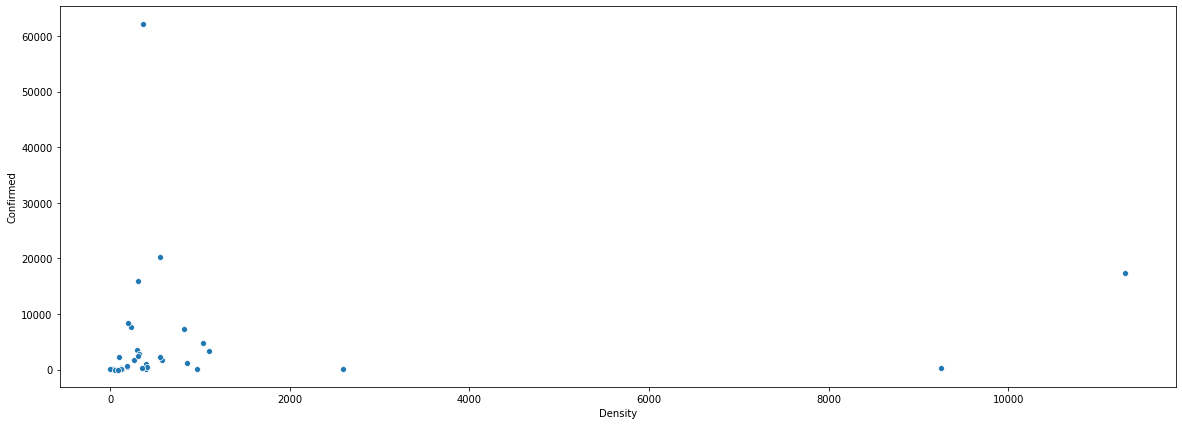

In [0]:
plt.figure(figsize=(20,7))
sns.scatterplot(
    crnt['Density'],
    crnt['Confirmed']
    )
plt.show()

**Observation**

- Looking at the data at this point shows no strong relation.

- The state with the highest population density seem to have lesser cases relatively while states with the median population density have the highest confirmed cases.

- Treatment of the outliers can be done to check correlation.

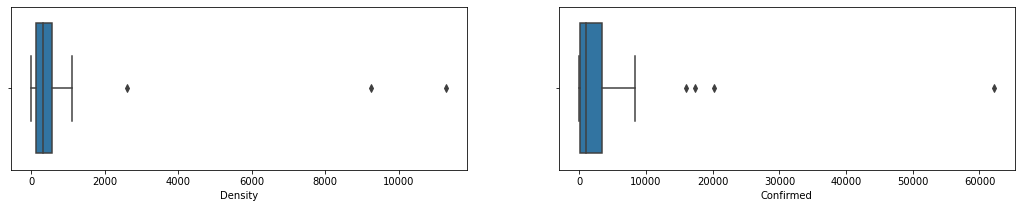

In [0]:
# checking the box plot for outliers
plt.figure(figsize=(18,3))
plt.subplot(121)
sns.boxplot(crnt['Density'])
plt.subplot(122)
sns.boxplot(crnt['Confirmed'])
plt.show()

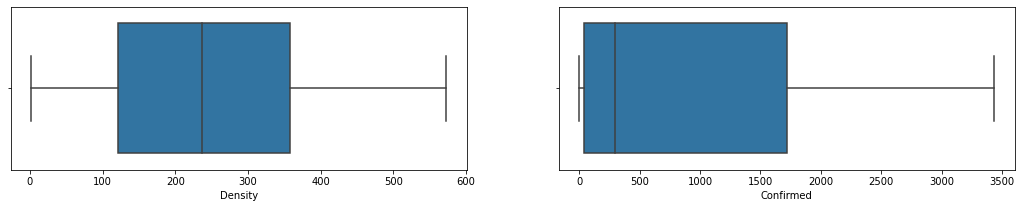

In [0]:
# treating the data and checking the boc plot again
plt.figure(figsize=(18,3))
plt.subplot(121)
sns.boxplot(crnt['Density'][crnt['Density']<600])
plt.subplot(122)
sns.boxplot(crnt['Confirmed'][crnt['Confirmed']<4000])
plt.show()

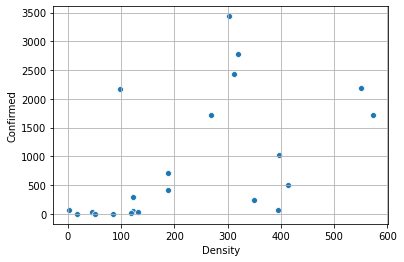

In [0]:
# looking at the scatter plot after outlier treatment
# plt.figure(figsize=(7,7))
sns.scatterplot(
    crnt['Density'][crnt['Density']<600],
    crnt['Confirmed'][(crnt['Confirmed']<4000)]
    )
plt.grid(which='both')
plt.show()

**Observations**

- There seems to be a correlation between the number of confirmed cases and population density.

- The exponential nature of spread of COVID19 means that once it reaches a tipping point the spread becomes independent of the population density.